<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#plt.subplots" data-toc-modified-id="plt.subplots-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>plt.subplots</a></span><ul class="toc-item"><li><span><a href="#plt.subplots(nrows,ncols)" data-toc-modified-id="plt.subplots(nrows,ncols)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span><code>plt.subplots(nrows,ncols)</code></a></span></li><li><span><a href="#Style" data-toc-modified-id="Style-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Style</a></span></li></ul></li><li><span><a href="#Types-of-charts" data-toc-modified-id="Types-of-charts-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Types of charts</a></span><ul class="toc-item"><li><span><a href="#ax.imshow" data-toc-modified-id="ax.imshow-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>ax.imshow</a></span></li><li><span><a href="#ax.bar" data-toc-modified-id="ax.bar-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>ax.bar</a></span></li></ul></li></ul></div>

**Notes**
- Guide on quick, practical chart making (doesn't go deep): [OO-API "lifecycle" tutorial](https://matplotlib.org/tutorials/introductory/lifecycle.html)

# plt.subplots

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## `plt.subplots(nrows,ncols)`

Overview:
- Returns a tuple
    - `Figure, array(Axes)` if multiple axes are created (most common)
    - `Figure, Axes` if only one axes is created
- The number of axes created (also the shape of the array) = `nrows` × `ncols`
- `Figure` holds objects and knows how to display them
- `Axes` are the data and settings for a chart
- `figsize`'s args annoyingly correspond to (cols,rows) – they are (h,w) in ~half-inches

Mental model:
- A `Figure` is a scientific figure, possibly with multiple charts
- An `Axes` is a single chart of a figure

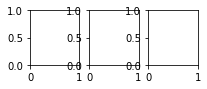

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(3,1))

Calling axes reveals that it's an array of axes.

In [ ]:
ax

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

Calling the figure displays it again.

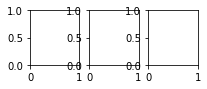

In [ ]:
fig

**Working with Axes**

Each axes object is a separate chart. Let's `Axes.plot()` some random data.

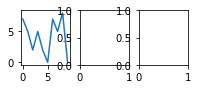

In [ ]:
x = np.arange(10)
y = np.random.randint(10,size=[10])

ax[0].plot(x,y)
fig

Calling plot on the same axis will create new plots. Plotting the same data twice creates two plots.

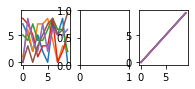

In [ ]:
# 5 lists of rand ints → ax0; 5 lists of identical sequential ints → ax1
for i in range(5):
    ax[0].plot(x, np.random.randint(10,size=[10]))
    ax[2].plot(x, x)
fig

Data is stored in `ax.lines` (a list) and is retrieved with `lines[idx].get_xdata()` and `lines[idx].get_ydata()`.

In [ ]:
for i in ax: print(len(i.lines))

6
0
5


In [ ]:
lines = ax[0].lines
for i in lines: print(i.get_xdata(), i.get_ydata())

[0 1 2 3 4 5 6 7 8 9] [7 5 2 5 2 0 7 5 8 0]
[0 1 2 3 4 5 6 7 8 9] [1 6 2 7 7 8 4 0 3 2]
[0 1 2 3 4 5 6 7 8 9] [5 4 7 4 4 6 8 6 6 2]
[0 1 2 3 4 5 6 7 8 9] [8 7 5 1 3 3 8 0 2 5]
[0 1 2 3 4 5 6 7 8 9] [0 8 4 2 7 2 6 5 5 6]
[0 1 2 3 4 5 6 7 8 9] [0 3 0 3 5 7 8 5 6 9]


We can clear one axes with `Axes.clear()`.

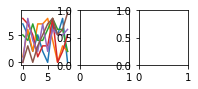

In [ ]:
ax[2].clear()
fig

The `Axes.figure` parameter points to its figure.

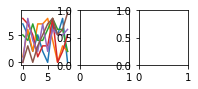

In [ ]:
ax[2].figure

## Style

Once an object is created, it's style cannot easily be changed. To change a figure's style, set the style as seen below and create a new fig.

View all of the styles here: [style sheet reference](https://matplotlib.org/3.2.1/gallery/style_sheets/style_sheets_reference.html). Some good ones: ggplot, seaborn-colorblind, dark_background.

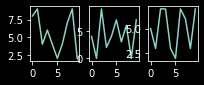

In [ ]:
plt.style.use('dark_background') # others: 
dark_fig, dark_ax = plt.subplots(1,3, figsize=(3,1))
for ax in dark_ax: ax.plot( np.arange(10), np.random.randint(10,size=[10]) )

In [ ]:
from fastai.vision.all import *
show_image??

# Types of charts

In [ ]:
plt.style.use('default') # others: 

In [ ]:
fs=np.array([1,1])
x  = np.arange(10)
y1 = np.random.rand(10)
y2 = np.random.rand(10)
grid = np.random.rand(10, 10)

## ax.imshow

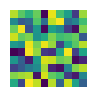

In [ ]:
_,ax = plt.subplots(figsize=fs)
ax.imshow(grid)
ax.axis('off');

## ax.bar

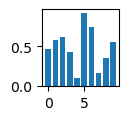

In [ ]:
_,ax = plt.subplots(figsize=fs)
ax.bar(x,y1);

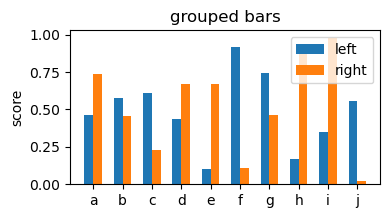

In [ ]:
w = .3
fig,ax = plt.subplots(figsize=[4,2])
ax.bar(x - w/2,y1,w,label='left')
ax.bar(x + w/2,y2,w,label='right')

ax.set_title('grouped bars')
ax.set_ylabel('score')
ax.set_xticks(x)
ax.set_xticklabels('a b c d e f g h i j'.split())
ax.legend(loc='upper right');